In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings                     #ignore warning
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
dataset = pd.read_csv('fish.csv')
dataset.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


## Discover and visualize the data to gain insights

In [3]:
dataset.shape

(159, 6)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [5]:
Input = dataset.iloc[:,1:]

## Scaling 

In [6]:
from sklearn.preprocessing import MinMaxScaler
Scal = MinMaxScaler()
xx = Scal.fit_transform(Input)

In [7]:
col = ['Weight', 'Length', 'Diagonal', 'Height', 'Width']

In [8]:
Input = pd.DataFrame(xx,columns=col)

In [9]:
Input

,Weight,Length,Diagonal,Height,Width
0,0.146667,0.309091,0.358108,0.568334,0.418978
1,0.175758,0.325455,0.378378,0.624055,0.459235
2,0.206061,0.329091,0.376689,0.618123,0.514279
3,0.220000,0.374545,0.417230,0.638566,0.480365
4,0.260606,0.374545,0.425676,0.621966,0.576004
...,...,...,...,...,...
154,0.007394,0.069091,0.077703,0.021012,0.048771
155,0.008121,0.072727,0.079392,0.040723,0.031208
156,0.007394,0.083636,0.084459,0.031842,0.029347
157,0.011939,0.107273,0.108108,0.066424,0.143719


In [10]:
Input.isna().sum().sum() #no null values are availavle here

0

In [11]:
dataset['Species'].nunique()

7

In [12]:
dataset['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

## Encoding 

In [13]:
from sklearn.preprocessing import LabelEncoder
LabEnc = LabelEncoder()
Output = LabEnc.fit_transform(dataset['Species'])

In [14]:
LabEnc.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [15]:
Output = pd.DataFrame(Output, columns=['Species'])

In [16]:
Output.head()

,Species
0,0
1,0
2,0
3,0
4,0


## Findout best state

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

accuracies = []

for state in range(100):

    Xtrain, Xtest, ytrain, ytest = train_test_split(Input, Output, test_size=0.2,random_state=state)
    #Random State: A parameter that ensures the reproducibility of random processes.
    
    LoR = LogisticRegression(random_state=42)
    LoR.fit(Xtrain, ytrain)
    score = LoR.score(Xtest, ytest)
    accuracies.append(score)

best_state = np.argmax(accuracies)
best_accuracy = max(accuracies) #Same as: np.max(accuracies)

print(f"Best Random State: {best_state}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Best Random State: 46
Best Accuracy: 0.8125


<h1 style="color:red"> Multinomial Logistic regression Formula</h1>

<img src='multiLinear.png' height='800' width='600'>

<img src='formula.png' height='700' width='500'>

In [221]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(Input,Output,test_size=0.2,random_state=46)

In [222]:
from sklearn.linear_model import LogisticRegression
LoR = LogisticRegression()

In [223]:
LoR.fit(Xtrain,ytrain)

LogisticRegression()

## Accuracy

In [224]:
LoR.score(Xtest,ytest) * 100   

81.25

In [225]:
y_predict = LoR.predict(Xtest)

In [226]:
y_predict

array([2, 0, 2, 2, 0, 2, 0, 2, 2, 5, 5, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 3, 0, 2, 2, 0, 2, 2, 2, 2])

In [227]:
dataset.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [228]:
data = np.c_[Xtest, ytest, y_predict]

In [229]:
dataset2 = pd.DataFrame(data, columns=['Weight', 'Length', 'Diagonal', 'Height', 'Width','Species','Species_Predict'])

In [230]:
dataset2.head(10)

,Weight,Length,Diagonal,Height,Width,Species,Species_Predict
0,0.072727,0.229091,0.251689,0.254588,0.316686,4.0,2.0
1,0.424242,0.483636,0.535473,0.842326,0.640139,0.0,0.0
2,0.515152,0.574545,0.565878,0.592050,0.854026,2.0,2.0
3,0.078788,0.234545,0.236486,0.270225,0.350474,2.0,2.0
4,0.432727,0.501818,0.552365,0.858375,0.677140,0.0,0.0
5,0.102424,0.283636,0.310811,0.336998,0.392930,4.0,2.0
6,0.260606,0.374545,0.425676,0.621966,0.576004,0.0,0.0
7,0.047273,0.187273,0.179054,0.201456,0.292597,2.0,2.0
8,0.078788,0.256364,0.256757,0.239578,0.363160,2.0,2.0
9,0.011939,0.107273,0.108108,0.066424,0.143719,5.0,5.0


<AxesSubplot:ylabel='Density'>

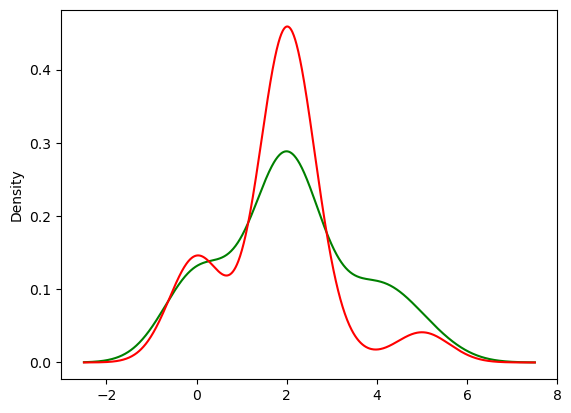

In [231]:
dataset2['Species'].plot(kind='kde',color='g') #green line---> original
dataset2['Species_Predict'].plot(kind='kde',color='r') #red line-----> Predicted